In [1]:
import pandas as pd 
#Confirmed cases datafile
datafile = '../data/time_series_covid19_confirmed_global_iso3_regions.csv'
#Read using pandas. Only include relevant columns
confirmed_df = pd.read_csv(datafile,usecols = lambda column : column not in ['Lat', 'Long','Region Code', 'Region Name', 'Sub-region Code', 'Sub-region Name', 'Intermediate Region Code','Intermediate Region Name'])
#Rename column for consistency
confirmed_df = confirmed_df.rename(columns={"ISO 3166-1 Alpha 3-Codes": "country_code"})
confirmed_df.drop(0, inplace = True)
confirmed_df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,country_code
1,NaN,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2894.0,3224.0,3392.0,3563.0,3778.0,4033.0,4402.0,4687.0,4963.0,AFG
2,NaN,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,803.0,820.0,832.0,842.0,850.0,856.0,868.0,872.0,876.0,ALB
3,NaN,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4648.0,4838.0,4997.0,5182.0,5369.0,5558.0,5723.0,5891.0,6067.0,DZA
4,NaN,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,750.0,751.0,751.0,752.0,752.0,754.0,755.0,755.0,758.0,AND
5,NaN,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,36.0,36.0,36.0,43.0,43.0,45.0,45.0,45.0,AGO


The count per country is is calculated and saved. For some countries the count has been entered for individual provinces or states, but for this project only the total count for each country is needed, therefore the data is grouped by country and summed to get the count for each country.

In [2]:
confirmed_df = confirmed_df.groupby(['country_code']).sum().reset_index()

In [3]:
confirmed_df.head()

,country_code,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2704.0,2894.0,3224.0,3392.0,3563.0,3778.0,4033.0,4402.0,4687.0,4963.0
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,35.0,36.0,36.0,36.0,43.0,43.0,45.0,45.0,45.0
3,AIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,795.0,803.0,820.0,832.0,842.0,850.0,856.0,868.0,872.0,876.0


#### Geo Data
The geo file is needed for drawing the map. The data is downloaded from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/ (accessed 5/1/20). 

It is read using geopandas and modified for better usability.

In [4]:
import geopandas as gpd

#Shape file
shapefile = '../data/geo_data/ne_110m_admin_0_countries.shp'
#Read shapefile using Geopandas. Only take the columns needed
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns
gdf.columns = ['country', 'country_code', 'geometry']
#Remove antartica because it is irrelevant and takes up a lot of space
gdf = gdf.drop(gdf.index[159]) 
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


#### Death count
Death count data is downloaded from https://data.humdata.org/dataset/5dff64bc-a671-48da-aa87-2ca40d7abf02 (accessed 5/13/20).

The death count file is read using pandas and also modified for better usability.

In [5]:
#Death count datafile
datafile = '../data/time_series_covid19_deaths_global_iso3_regions.csv'
#Read using pandas. Only include relevant columns
deaths_df = pd.read_csv(datafile,usecols = lambda column : column not in ['Region Code', 'Region Name', 'Sub-region Code', 'Sub-region Name', 'Intermediate Region Code','Intermediate Region Name'])
#Rename column for consistency
deaths_df = deaths_df.rename(columns={"ISO 3166-1 Alpha 3-Codes": "country_code"})
deaths_df = deaths_df.rename(columns={"Country/Region": "country"})
deaths_df.drop(0, inplace = True)
deaths_df.head()

,Province/State,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,country_code
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,95.0,104.0,106.0,109.0,115.0,120.0,122.0,127.0,AFG
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,ALB
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,465.0,470.0,476.0,483.0,488.0,494.0,502.0,507.0,515.0,DZA
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,46.0,46.0,47.0,47.0,48.0,48.0,48.0,48.0,AND
5,NaN,Angola,-11.2027,17.8739,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,AGO


First the total number of dead is saved in a separate dataframe.

In [6]:
#Sum date columns and save to a new dataframe
global_dead_df = deaths_df.sum(numeric_only=True).reset_index()

In [7]:
#Rename columns
global_dead_df.columns=['date', 'dead']

In [8]:
global_dead_df.head()

,date,dead
0,1/22/20,17.0
1,1/23/20,18.0
2,1/24/20,26.0
3,1/25/20,42.0
4,1/26/20,56.0


Then the death count per country is is calculated and saved. For some countries the death count has been entered for individual provinces or states, therefore the data is grouped by country and summed to get the count for each country.

In [9]:
deaths_df.head()

,Province/State,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,country_code
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,95.0,104.0,106.0,109.0,115.0,120.0,122.0,127.0,AFG
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,ALB
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,465.0,470.0,476.0,483.0,488.0,494.0,502.0,507.0,515.0,DZA
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,46.0,46.0,47.0,47.0,48.0,48.0,48.0,48.0,AND
5,NaN,Angola,-11.2027,17.8739,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,AGO


In [10]:
country_total_df = deaths_df.groupby(['country_code','country']).sum().reset_index()

In [11]:
country_total_df.head()

,country_code,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,ABW,Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.0,90.0,95.0,104.0,106.0,109.0,115.0,120.0,122.0,127.0
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,AIA,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0


#### Government Responses Dataset
The government responses dataset or countermeasures dataset is downloaded from https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker (accessed 5/13/20). The 'timeseries' form is used. The dataset is comprised of multiple sheets, one for each countermeasure.

First the data is read and saved in a dictionary. Only the relevant sheets are stored.

In [12]:
xls = pd.ExcelFile('../data/OxCGRT_timeseries_all.xlsx')
xls.sheet_names

['stringencyindex_legacy',
 'c1_schoolclosing',
 'c1_flag',
 'c2_workplaceclosing',
 'c2_flag',
 'c3_cancelpublicevents',
 'c3_flag',
 'c4_restrictionsongatherings',
 'c4_flag',
 'c5_closepublictransport',
 'c5_flag',
 'c6_stayathomerequirements',
 'c6_flag',
 'c7_domestictravel',
 'c7_flag',
 'c8_internationaltravel',
 'h1_publicinfocampaign',
 'h1_flag',
 'h2_testingpolicy',
 'h3_contacttracing',
 'confirmedcases',
 'confirmeddeaths']

In [13]:
relevant_sheets = [sheet for sheet in xls.sheet_names if '_' in sheet and not 'flag' in sheet]
relevant_sheets

['stringencyindex_legacy',
 'c1_schoolclosing',
 'c2_workplaceclosing',
 'c3_cancelpublicevents',
 'c4_restrictionsongatherings',
 'c5_closepublictransport',
 'c6_stayathomerequirements',
 'c7_domestictravel',
 'c8_internationaltravel',
 'h1_publicinfocampaign',
 'h2_testingpolicy',
 'h3_contacttracing']

In [14]:
countermeasure_dfs = pd.read_excel('../data/OxCGRT_timeseries_all.xlsx', sheet_name=relevant_sheets)

In [15]:
countermeasure_dfs.keys()

odict_keys(['stringencyindex_legacy', 'c1_schoolclosing', 'c2_workplaceclosing', 'c3_cancelpublicevents', 'c4_restrictionsongatherings', 'c5_closepublictransport', 'c6_stayathomerequirements', 'c7_domestictravel', 'c8_internationaltravel', 'h1_publicinfocampaign', 'h2_testingpolicy', 'h3_contacttracing'])

A helper method is defined to convert dates to the same format as in the other datasets. 

In [16]:
def convertDate(date): 
    #do nothing if it is one of the two special columns
    if (date =='CountryName' or date =='CountryCode'): return date
    # convert e.g. 22jan2020 into 1/22/20
    s = str(date)
    day = str(int(s[0:2]))
    month = s[2:5]
   
    switcher = {
        'jan': 1,
        'feb': 2,
        'mar': 3,
        'apr': 4,
        'may': 5
    }
    month = str(switcher[month])
    year = s[7:9]
    
    return month + '/' + day + '/' + year


The dataframes are formatted for better usability. The date is converted using the helper method defined above and the the country code column is renamed for consistency. 

In [17]:
#Each dataframe is formatted
for key in countermeasure_dfs.keys():
    #Convert date
    countermeasure_dfs[key].columns =  countermeasure_dfs[key].columns.to_series().apply(convertDate)
    #Rename column
    countermeasure_dfs[key] = countermeasure_dfs[key].rename(columns={"CountryCode": "country_code"})
    countermeasure_dfs[key] = countermeasure_dfs[key].rename(columns={"CountryName": "country"})
    

Take a look at one of the dataframes

In [18]:
countermeasure_dfs['c1_schoolclosing'].head()

,country,country_code,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN
1,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN
2,Angola,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
3,Albania,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
4,Andorra,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN


#### Population
To be able to show dead per million, the population count for each country is needed. 

The dataset is downloaded from: https://data.worldbank.org/indicator/sp.pop.totl (accessed 13/5/20).

In [19]:
#Population datafile
datafile = '../data/population.csv'
#Read using pandas. Only include relevant columns
population = pd.read_csv(datafile,header=2, usecols = lambda column : column in ['Country Code', '2018'])
#Rename columns
population.columns=['country_code', 'population']

Add population info to country death count dataframe by merging population with dataframe.

In [20]:
#Merge on contry code
country_total_df_with_population = country_total_df.merge(population, on = 'country_code', how = 'left').reset_index(drop=True)
country_total_df_with_population.head()

,country_code,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,population
0,ABW,Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,105845.0
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,95.0,104.0,106.0,109.0,115.0,120.0,122.0,127.0,37172386.0
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,30809762.0
3,AIA,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,2866376.0


The population is missing for some countries. The following lists all rows with missing population.

In [21]:
#List rows with missing population
country_total_df_with_population[country_total_df_with_population['population'].isna()]

,country_code,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,population
3,AIA,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
16,BES,Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
23,BLM,France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
59,ERI,Eritrea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
60,ESH,Western Sahara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
66,FLK,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
75,GLP,France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,12.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,NaN
83,GUF,France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
135,MSR,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN
136,MTQ,France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,NaN


The population count is missing for 17 of the countries in the death count dataset. Since there are only 17 missing values these are added manually. The population for every country but two is found on www.worldometers.info. The sources for the other two are listed below.

AIA Anguilla: 14,731

BES Caribbean Netherlands: 25,987 (source https://en.wikipedia.org/wiki/Caribbean_Netherlands)

BLM Saint Barthélemy 9,793 (source https://en.wikipedia.org/wiki/Saint_Barth%C3%A9lemy)

ESH Western Sahara: 567,402

FLK Falkland Islands: 3,234

GLP Guadeloupe: 400,124

GUF French Guiana: 298,682

MSR Montserrat: 4,992

MTQ Martinique: 375,265

MYT Mayotte: 272,815 (source https://en.wikipedia.org/wiki/Mayotte)

REU Réunion: 859,959 (source https://en.wikipedia.org/wiki/R%C3%A9union)

SPM Saint Pierre and Miquelon: 6,008 (source https://en.wikipedia.org/wiki/Saint_Pierre_and_Miquelon)


TWN Taiwan: 23,726,460

ERI Eritrea: 3,457,786

VAT Holy See: 801

RKS Kosovo: 1,797,086 (source: https://en.wikipedia.org/wiki/Demographics_of_Kosovo)




The population is added manually by index.

In [22]:
#Set population value for the missing countries
country_total_df_with_population.at[3,'population'] = 14731
country_total_df_with_population.at[16,'population'] = 25987 
country_total_df_with_population.at[23,'population'] = 9793
country_total_df_with_population.at[59,'population'] = 3457786
country_total_df_with_population.at[60,'population'] = 567402
country_total_df_with_population.at[66,'population'] = 3234
country_total_df_with_population.at[75,'population'] = 400124
country_total_df_with_population.at[83,'population'] = 298682
country_total_df_with_population.at[135,'population'] = 4992
country_total_df_with_population.at[136,'population'] = 375265
country_total_df_with_population.at[140,'population'] = 272815
country_total_df_with_population.at[162,'population'] = 859959
country_total_df_with_population.at[163,'population'] = 1797086 
country_total_df_with_population.at[175,'population'] = 6008
country_total_df_with_population.at[196,'population'] = 23726460
country_total_df_with_population.at[203,'population'] = 801

A final check to ensure that there are no missing values.

In [23]:
country_total_df_with_population[country_total_df_with_population['population'].isna()]

,country_code,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,population


In [24]:
country_total_df_with_population.isnull().values.any()

False

The dataframe is now complete. 

#### Dataframe with dead per million
To make it easier to work with a separate dataframe is created where the death count is listed as number of dead per million instead of total number of dead. 

First a list of the relevant columns is created. These are all the date columns. There are a few special columns that do not contain other values for the countries than dead count. These are the columns: country, country code, geometry and the newly added population. 

In [25]:
#List special columns
special_columns = ['country', 'country_code', 'geometry', 'population']
#List date columns by taking every column that is not in the other list
date_columns = [x for x in country_total_df_with_population.columns if x not in special_columns]

The new dataframe is created by dividing by population divided with a million. There are some 'no data' values which must be skipped and there are some countries with a population of zero witch must also be skipped. 

In [26]:
#Copy the country total dataframe
dead_per_million_df = country_total_df_with_population.copy()
for date in date_columns: 
    #Convert column to numeric
    dead_per_million_df[date]= pd.to_numeric(dead_per_million_df[date], errors='coerce')
    #Calculate dead per million
    dead_per_million_df[date] = (dead_per_million_df[date]/((country_total_df_with_population['population'])/1000000)).where(not(isinstance(country_total_df_with_population[date], str) ) and (country_total_df_with_population['population']>0), dead_per_million_df[date])


Take a look at the new dataframe. 

In [27]:
dead_per_million_df.head()

,country_code,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,population
0,ABW,Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.895555,18.895555,18.895555,28.343332,28.343332,28.343332,28.343332,28.343332,28.343332,105845.0
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.421152,2.555661,2.797776,2.851579,2.932284,3.093694,3.228203,3.282006,3.416515,37172386.0
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,0.064914,30809762.0
3,AIA,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14731.0
4,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,10.815050,2866376.0



### Data Exploration
Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.


### Death Count Data
In the following the initial processing and exploration of the death count dataset is done.

There are two dataframes: one with global death count and one with death count per country. 

The global death count dataset contains only two columns: date and number of dead. 

In [28]:
global_dead_df.head()

,date,dead
0,1/22/20,17.0
1,1/23/20,18.0
2,1/24/20,26.0
3,1/25/20,42.0
4,1/26/20,56.0


In [29]:
global_dead_df.shape

(112, 2)

There are 112 rows i.e. 112 dates in the dataset. 

The dataframe is plotted using a line plot to get an overview of the data. 

In [30]:
import matplotlib.pyplot as plt
global_dead_df.plot.line(title='Total dead globaly', x = 'date', y='dead', figsize=(20,10), legend=False);

The death count is nearly 0 until around the 20'th of March where it really takes of and grows steadily.

Looking at the other dataset containing data for each country gives us an overview of how many have died in each country.

In [31]:
country_total_df.head()

,country_code,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,ABW,Netherlands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0
1,AFG,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,85.0,90.0,95.0,104.0,106.0,109.0,115.0,120.0,122.0,127.0
2,AGO,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
3,AIA,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ALB,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0


In [32]:
country_total_df.shape

(212, 114)

There is one row for each country. The first two columns indicate which country it is: one containing the ISO 3166-1 Alpha 3 code for the country and one containing the country name. The rest of the columns are date columns ranging from 1/22 to 5/12. There is a total of 212 countries and a total of 112 date columns. 

To get an overview of the data the newest death count for each country is visualized using a bar plot. 

In [33]:
#Take newest column which is the last column in the dataframe
newest = country_total_df.iloc[:,[1,-1]]
#Rename columns
newest.columns=['country','dead']


A histogram is well suited to give an overview of the distribution of the data. 

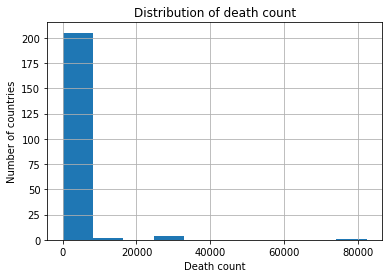

In [34]:
#Plot histogram
ax = newest.hist()
ax[0][0].set_xlabel("Death count")
ax[0][0].set_ylabel("Number of countries")
ax[0][0].set_title('Distribution of death count');

The plot shows that the majority of countries have a very low death count compared to a few others. 


Let us zoom in on the countries with most dead. These are plotted in a bar plot below.

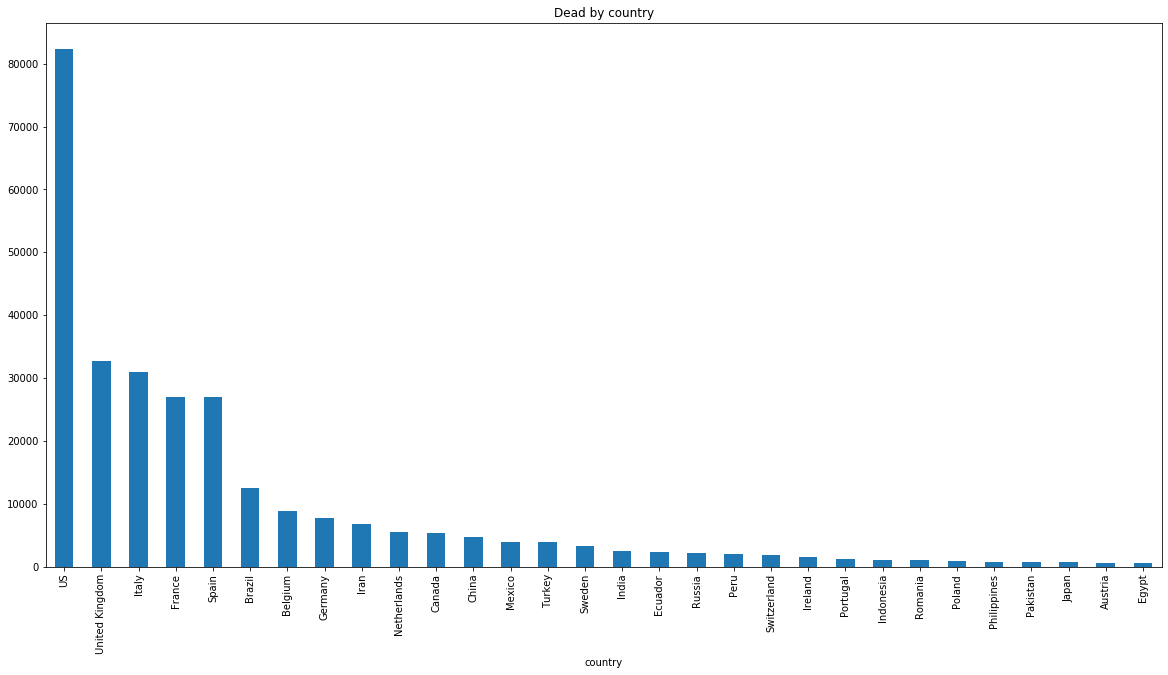

In [35]:
#Plot in using a bar plot
newest.sort_values(by='dead', ascending=False)[:30].plot.bar(legend=False,title='Dead by country', x = 'country', y='dead', figsize=(20,10));

What happens if we look at dead per million instead?

In [36]:
#Select columns
newest_per_million = dead_per_million_df.iloc[:,[1,-2]]
#Rename columns
newest_per_million.columns=['country','dead']


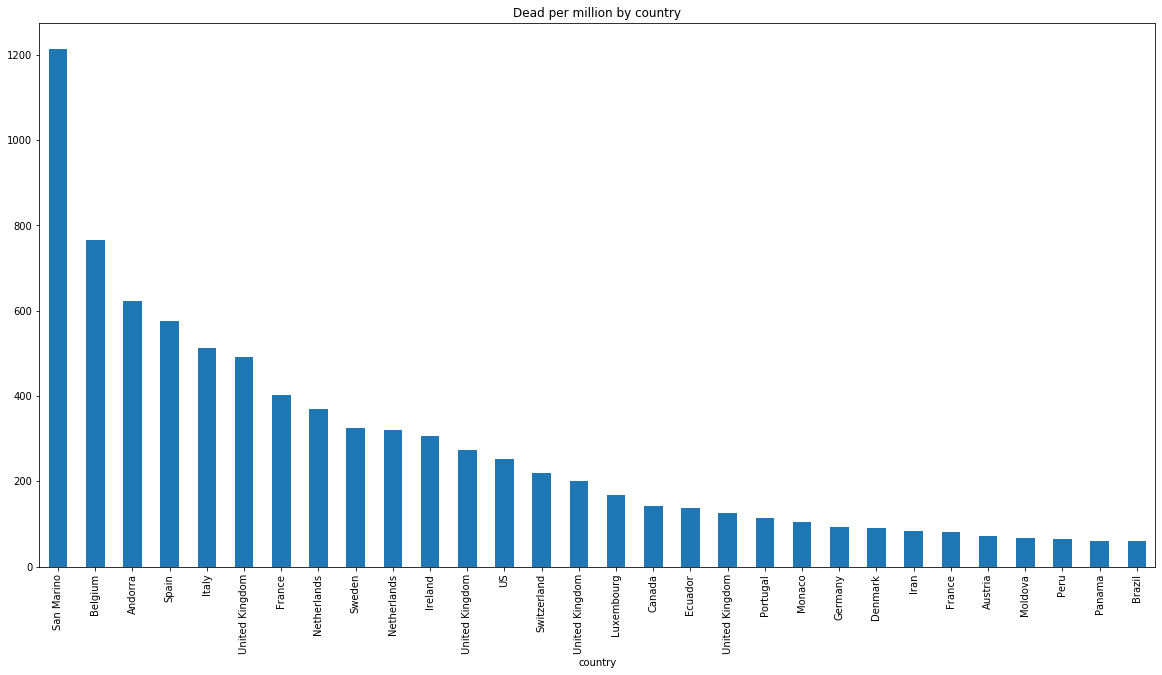

In [37]:
newest_per_million.sort_values(by='dead', ascending=False)[:30].plot.bar(legend=False,title='Dead per million by country', x = 'country', y='dead', figsize=(20,10));

Death count per million shows quite a different picture than total death count. The top 5 countries are still in there but they are not in top 5 any more. When comparing countries dead per million might be more relevant than total death count. 

#### Geographical Distribution
To get a geographical overview of the death count the count is plotted on a world map. For this the deaths dataframe is used where death count is not grouped by country but there are individual counts for some provinces and states.

In [38]:
deaths_df.head()

,Province/State,country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,country_code
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,95.0,104.0,106.0,109.0,115.0,120.0,122.0,127.0,AFG
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,31.0,ALB
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,465.0,470.0,476.0,483.0,488.0,494.0,502.0,507.0,515.0,DZA
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,46.0,46.0,47.0,47.0,48.0,48.0,48.0,48.0,AND
5,NaN,Angola,-11.2027,17.8739,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,AGO


In [39]:
import folium
import math

#Define helper method to get the country name nicely formatted. 
def getCountry(row):
    #If there is a province/state then include it and the country name in parenthesis
    if isinstance(row['Province/State'], str):
        return str(row['Province/State']) + '('+ row.country+')'
    #If there is not province/state then just retunr the country name
    else:
        return row.country

#Create folium map
world_map = folium.Map([40, 0],tiles = "Stamen Terrain", zoom_start=2)

#Plot death count on map with red dots with a radius corresponding the number of dead
for index,row in deaths_df.iterrows(): 
    #Only plot counts of more than zero
    if (row[deaths_df.columns[-2]] > 0):
        folium.CircleMarker([row.Lat, row.Long],
                        radius=(row[deaths_df.columns[-2]])/1000,
                        popup= getCountry(row) + ' \n'+ str(row[country_total_df.columns[-1]]),
                        fill=True, # Set fill to True
                        fill_color='red',
                        color='red',
                        weight=0.1,
                        fill_opacity=0.6
                        ).add_to(world_map)
world_map

From the map it is evident that the US and Europe are heavily affected.

#### Government Responses dataset

The response/countermeasures dataset is a dictionary of 12 different dataframes, one for each measure. 

In [40]:
countermeasure_dfs.keys()

odict_keys(['stringencyindex_legacy', 'c1_schoolclosing', 'c2_workplaceclosing', 'c3_cancelpublicevents', 'c4_restrictionsongatherings', 'c5_closepublictransport', 'c6_stayathomerequirements', 'c7_domestictravel', 'c8_internationaltravel', 'h1_publicinfocampaign', 'h2_testingpolicy', 'h3_contacttracing'])

In [41]:
for key in countermeasure_dfs.keys():
    print(key)
    print(countermeasure_dfs[key].shape)

stringencyindex_legacy
(161, 135)
c1_schoolclosing
(161, 135)
c2_workplaceclosing
(161, 135)
c3_cancelpublicevents
(161, 135)
c4_restrictionsongatherings
(161, 135)
c5_closepublictransport
(161, 135)
c6_stayathomerequirements
(161, 135)
c7_domestictravel
(161, 135)
c8_internationaltravel
(161, 135)
h1_publicinfocampaign
(161, 135)
h2_testingpolicy
(161, 135)
h3_contacttracing
(161, 135)


Each dataframe consists of 161 rows and 135 columns. There is one row for each country and there are two columns indicating what country this is: country name and SO 3166-1 Alpha 3 code for the country. The rest of the columns are date columns ranging from the 1'st of January and updated daily. 

In [42]:
countermeasure_dfs['c1_schoolclosing'].head()

,country,country_code,1/1/20,1/2/20,1/3/20,1/4/20,1/5/20,1/6/20,1/7/20,1/8/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,Aruba,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN
1,Afghanistan,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN
2,Angola,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
3,Albania,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN
4,Andorra,AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN


To get an overview over when countries reacted to the outbreak the stringency index dataframe is explored further. 

It is interesting to see when the first countermeasures were initiated. The date of the first countermeasures can be obtained by looking at the date when the stringency index became larger than zero. 

First rows with no data are removed. 

In [43]:
#Store the two country columns
country_cols = countermeasure_dfs['stringencyindex_legacy'].columns[0:2]
#Store all date columns
date_cols = countermeasure_dfs['stringencyindex_legacy'].columns[3:]
#Copy the dataframe to a new variable
stringency_df = countermeasure_dfs['stringencyindex_legacy'].copy()


In [44]:
#Drop rows with NaN values
stringency_df =stringency_df.dropna(subset=date_cols, how = 'all').reset_index(drop=True)

Additional to obtaining the date for the first countermeasure, the date when the stringency index reached 10, 20, 30 etc are also saved. These dates are saved in new columns in the same dataframe.

In [45]:
import numpy as np

#Helper method to get first item in list of dates
def getFirst(l):
    #If any dates were found then return the first
    if (len(l) > 0):
        return l[0]
    else:
        #If no dates were found, then return the last day possible 
        return len(date_cols)
    
#The list of stringency columns will be used later
stringency_cols = []

for i in range(10):
    stringency_cols.append('above_'+ str(i*10))
    #Store list of all dates where the stringency is above the threshhold
    stringency_df['above_'+ str(i*10)] = stringency_df.iloc[:,3:len(date_cols)+2].apply(lambda x: (np.where( x > (i*10))[0]), axis=1)
    #Get the first date
    stringency_df['above_'+ str(i*10)] = stringency_df['above_'+ str(i*10)].apply(getFirst)

    

#### Visualizing
The date for the first countermeasure is visualized a plot. 

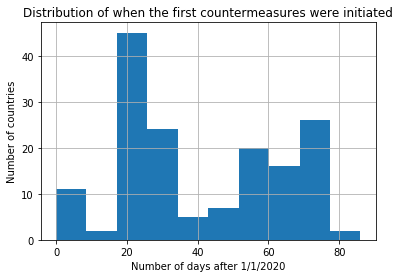

In [46]:
ax = stringency_df[['country','above_0']].hist()
ax[0][0].set_xlabel('Number of days after 1/1/2020')
ax[0][0].set_ylabel("Number of countries")
ax[0][0].set_title('Distribution of when the first countermeasures were initiated');

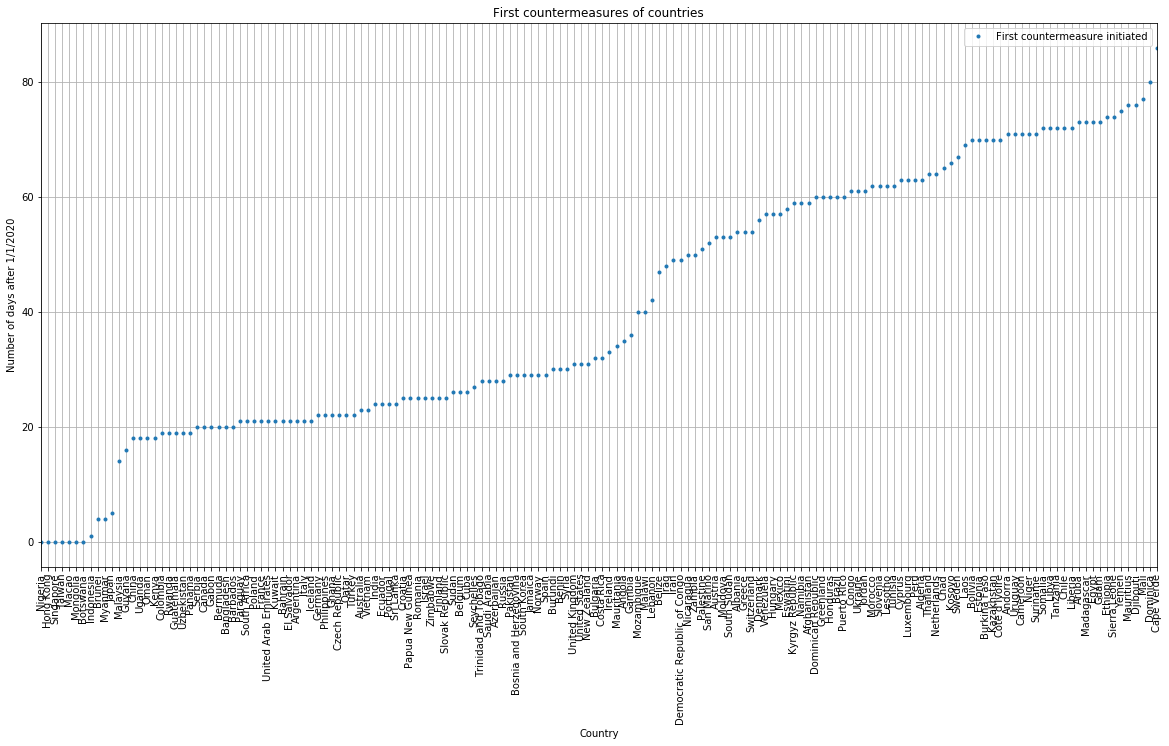

In [47]:
%matplotlib inline
ax = stringency_df.sort_values(by='above_0').plot(title='First countermeasures of countries',style='.',x = 'country', y='above_0',grid=True, figsize=(20,10), xticks=stringency_df.index, rot=90)

ax.set_xticklabels(stringency_df.sort_values(by='above_0').country, rotation=90);
ax.set_ylabel('Number of days after 1/1/2020');
ax.set_xlabel('Country');
ax.legend(['First countermeasure initiated']);

The plot is not very pretty but it does provide an overview. It might be more interesting to see how many days after the first confirmed case the government responded with the first countermeasure. For this the dataset for the confirmed cases is used. 

First the day of the first confirmed case is obtained. 

In [48]:
confirmed_df.head()

,country_code,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0,101.0
1,AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2704.0,2894.0,3224.0,3392.0,3563.0,3778.0,4033.0,4402.0,4687.0,4963.0
2,AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,35.0,35.0,36.0,36.0,36.0,43.0,43.0,45.0,45.0,45.0
3,AIA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
4,ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,795.0,803.0,820.0,832.0,842.0,850.0,856.0,868.0,872.0,876.0


This dataframe starts 22'nd of January while the other starts 1'st of January. So we need to compensate for this. 

In [49]:
#Get date of first confirmed case
confirmed_df['first_case'] = confirmed_df.iloc[:,1:].apply(lambda x: (np.where( x > 0)[0][0]), axis=1)
#Add 21 days to this
confirmed_df['first_case']= confirmed_df['first_case'] + 21

How many days are between the first case and the first countermeasures?

In [50]:
#Merge the two dataframes and store in a new variable
reaction_time_df = stringency_df.merge(confirmed_df, on='country_code')[['country', 'country_code','first_case']+stringency_cols]

In [51]:
#Convert the stringency columns from absolute days to difference between date of first case and date of first countermeasure
reaction_time_df[stringency_cols]=reaction_time_df[stringency_cols].apply(lambda x: x - reaction_time_df['first_case'])

Visualize the new data

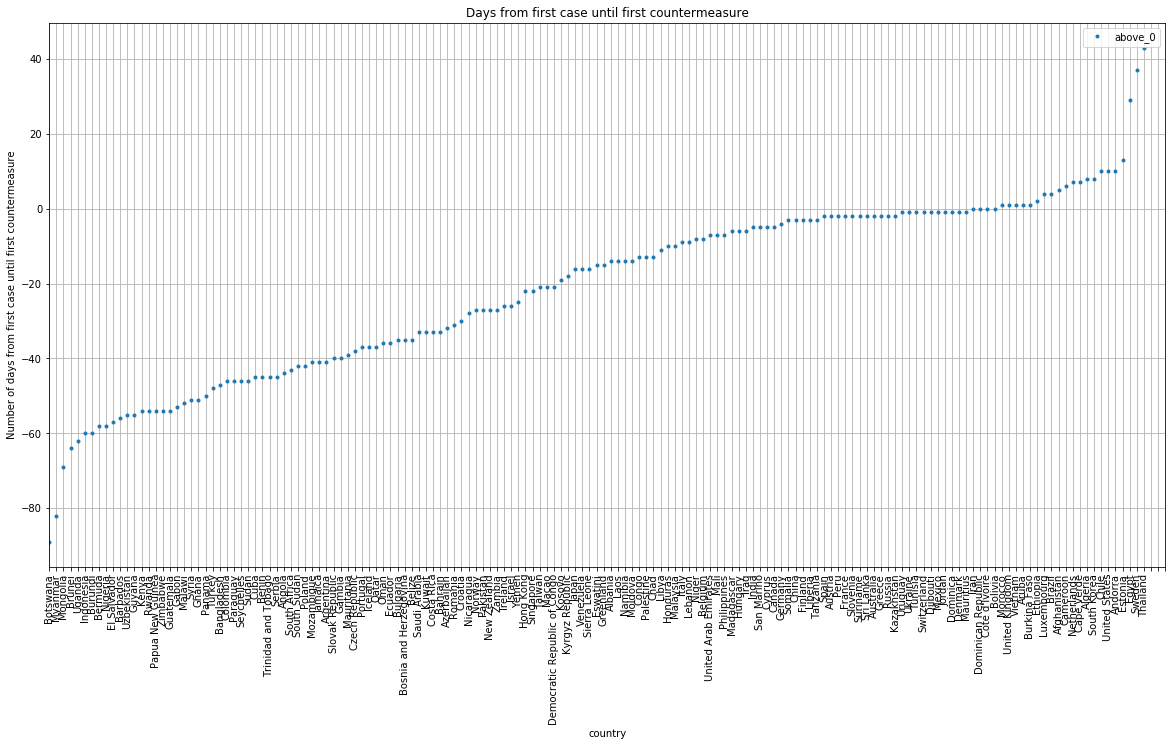

In [52]:
ax = reaction_time_df.sort_values(by='above_0').plot(title='Days from first case until first countermeasure',style='.',x = 'country', y='above_0',grid=True, figsize=(20,10), xticks=stringency_df.index, rot=90)

ax.set_xticklabels(reaction_time_df.sort_values(by='above_0').country, rotation=90);
ax.set_ylabel('Number of days from first case until first countermeasure');

The visualization is not very pretty, but it does give an overview. However a histogram might be better suited to show the distribution of the data. 

A plot is created showing the distribution of the data when setting the threshold to 0, 10, 20, 30.. etc. 

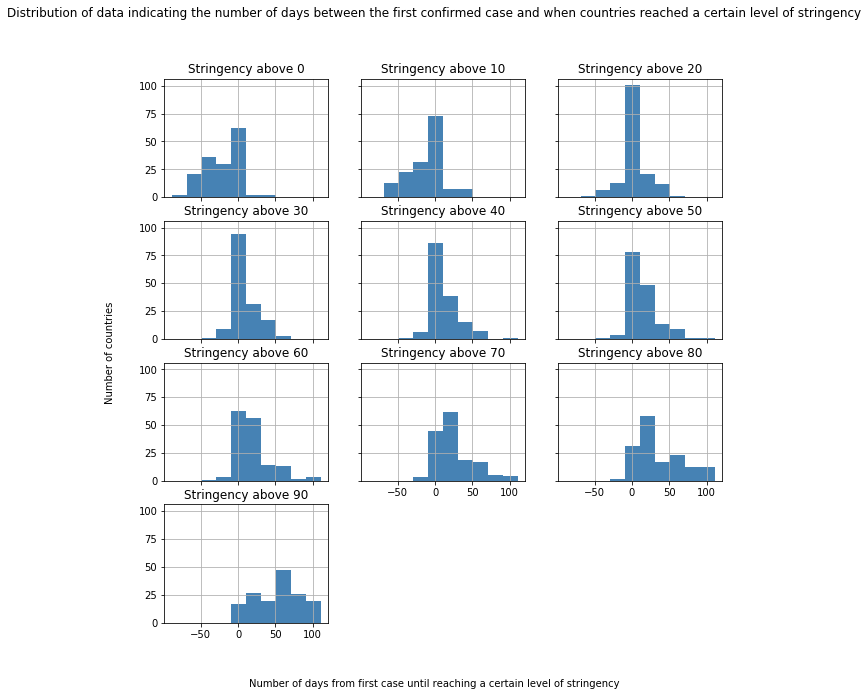

In [53]:
ax = reaction_time_df[['country']+stringency_cols].plot(kind='hist',subplots=True,sharex=True,sharey=True,
                                                        title='Distribution of data indicating the number of days between the first confirmed case and when countries reached a certain level of stringency',
                                                        layout=(4,3), figsize=(10,10),legend=False, grid=True, color='steelblue')
def getPlotNumber(i,j):
    return i*3+j


for i in range(4):
    for j in range(3):
        ax[i][j].set_title('Stringency above ' + str(getPlotNumber(i,j)*10))
        ax[i][j].set_ylabel('')

fig=ax[0,0].figure
fig.text(0.5,0.04, 'Number of days from first case until reaching a certain level of stringency', ha="center", va="center")
fig.text(0.05,0.5, "Number of countries", ha="center", va="center", rotation=90);


The plot shows that most countries initiated the first countermeasures before the first confirmed case and most countries reached a stringency of 20-40 around the same time as the first confirmed case.

It is interesting to inspect whether any correlation between countermeasures and death count can be found. It is our assumption that early intervention does result in a lower death count. This will be explored in the following. 

First we will look at the total number of dead vs the number of days from first case to first countermeasure for each country. We will plot them against each other at do linear regression and calculate the R^2 value to evaluate the correlation. 

The final dead per million value is added to the reaction time dataframe.

In [54]:
#Get last date
last_date = dead_per_million_df.columns[-2]

#Merge the reaction time dataframe with dead per million for the last date in the dataset 
reaction_time_df = reaction_time_df.merge(dead_per_million_df[['country_code', last_date]], on='country_code')
#Rename column
reaction_time_df.rename(columns={last_date: "dead_per_million"}, inplace=True)
#Convert to numeric
reaction_time_df['dead_per_million']= pd.to_numeric(reaction_time_df['dead_per_million'], errors='coerce')

Methods to calculate R^2 are defined. These are taken from wikipedia: (https://en.wikipedia.org/wiki/Coefficient_of_determination)

In [55]:
#The total sum of squares
def SStot(Y):
    return sum([(y-np.mean(Y))*(y-np.mean(Y)) for y in Y])

#The regression sum of squares 
def SSres(Y, Y_pred):
    return sum([(y-y_pred)*(y-y_pred) for y,y_pred in zip(Y,Y_pred)])

#R^2
def R_squared(Y,Y_pred):
    return 1- (SSres(Y,Y_pred)/SStot(Y))


The death count is plotted against the number of days from the first confirmed case and the time the stringency level reached a certain threshold. This is plotted for the thresholds 0, 10, 20, .., 90. 

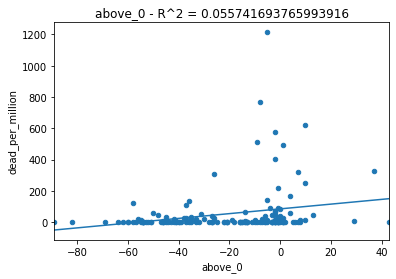

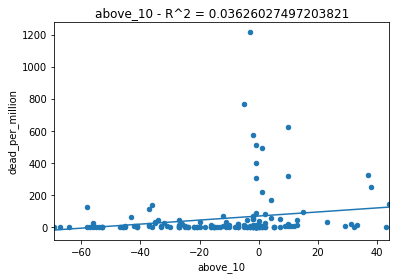

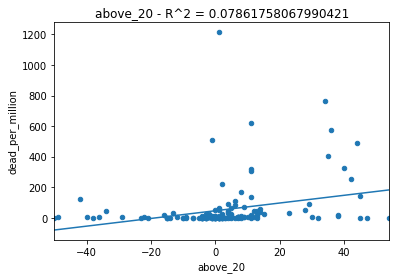

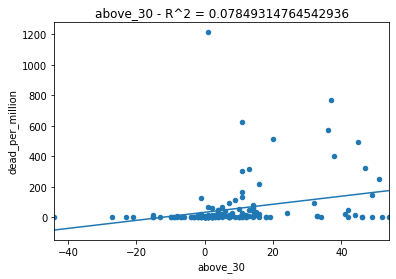

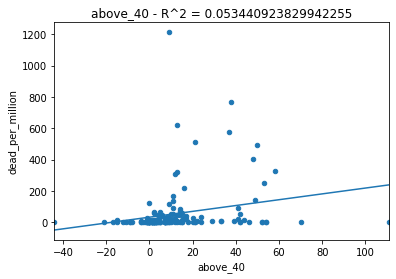

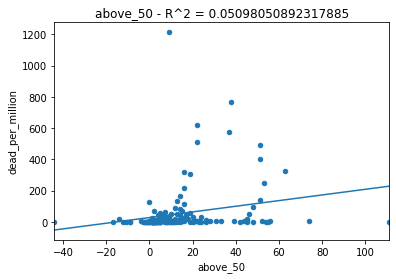

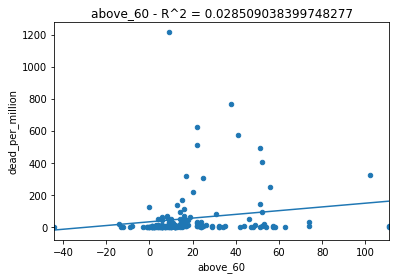

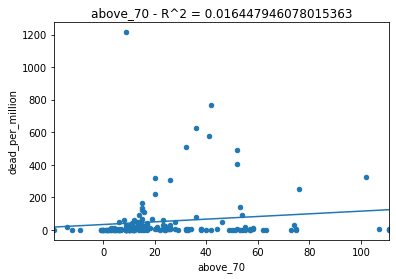

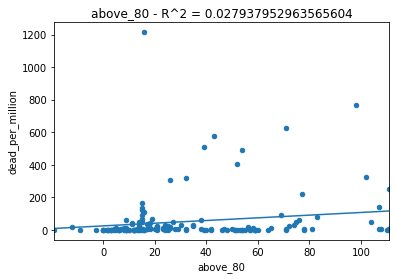

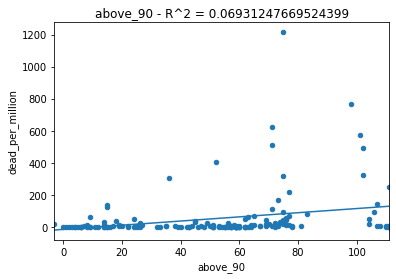

In [118]:
#Plot for each threshold
for i in range(10):
    #Copry dataframe to work on
    lin_reg_df = reaction_time_df.copy()
    #Define threshold
    num = str(i*10)
    #Linear regression
    z = np.polyfit(x=reaction_time_df.loc[:, 'above_'+num], y=reaction_time_df.loc[:, 'dead_per_million'], deg=1)
    p = np.poly1d(z)
    lin_reg_df['trendline'] = p(lin_reg_df.loc[:, 'above_'+num])
    #Plot scatter
    ax = lin_reg_df.plot.scatter(x='above_'+num, y='dead_per_million')
    #Calculate R^2
    r = R_squared(list(reaction_time_df['dead_per_million']), list(lin_reg_df['trendline']))
    #Plot line
    lin_reg_df.set_index('above_'+num, inplace=True)
    lin_reg_df.trendline.sort_index(ascending=False).plot(title='above_'+num +' - R^2 = '+str(r),ax=ax)


The trend is in the expected direction, but it is not a very strong correlation.

__What happens if we look at when *specific* countermeasures were initiated instead?__

In the following dead per million and the number of days from first case until the countermeasure was initiated is plotted against each other for each of the different countermeasures.

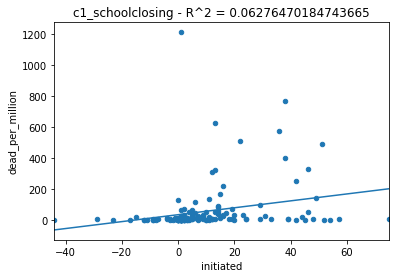

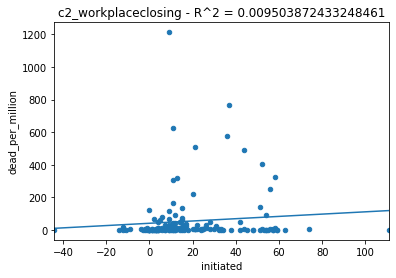

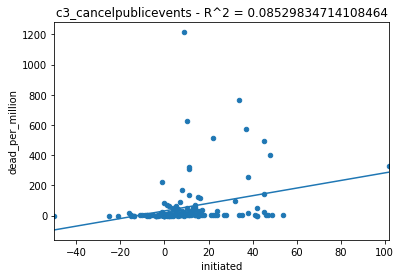

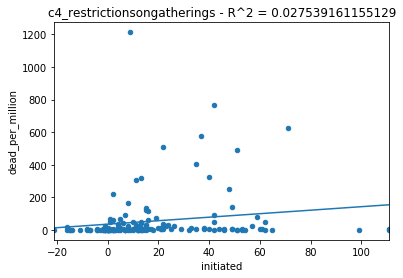

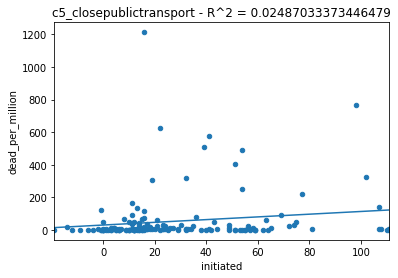

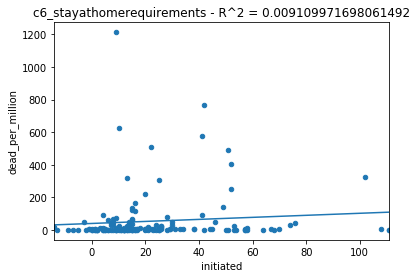

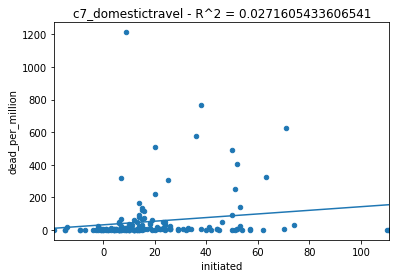

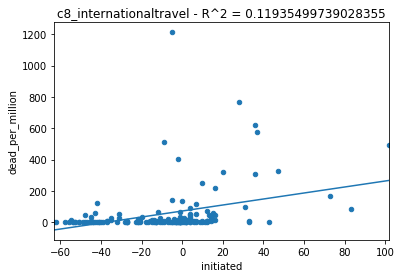

In [117]:
#The list of interesting countermeasures is created
countermeasures_list = [item for item in list(countermeasure_dfs.keys()) if (item.startswith('c') and '_' in item)]

#Plot for each countermeasure
for measure in countermeasures_list:
    #Copy dataframe to work on
    lin_reg_df = countermeasure_dfs[measure].copy()

    #Get day for when measure was initiated
    lin_reg_df['initiated'] = lin_reg_df.iloc[:,3:len(date_cols)+2].apply(pd.to_numeric, errors='coerce', axis=1).apply(lambda x: (np.where( x > (0))[0]), axis=1)
    lin_reg_df['initiated'] = lin_reg_df['initiated'].apply(getFirst)

    #Merge with confirmed cases
    lin_reg_df = lin_reg_df.merge(confirmed_df, on='country_code')[['country', 'country_code','first_case','initiated']]

    #Merge with dead per million
    lin_reg_df = lin_reg_df.merge(dead_per_million_df[['country_code', last_date]], on='country_code')
    lin_reg_df.rename(columns={last_date: "dead_per_million"}, inplace=True)
    lin_reg_df['dead_per_million']= pd.to_numeric(lin_reg_df['dead_per_million'], errors='coerce')

    #Get number of days from first case to countermeasre initiated
    lin_reg_df['initiated']=lin_reg_df['initiated']- lin_reg_df['first_case']

    #Linear regression
    z = np.polyfit(x=lin_reg_df.loc[:, 'initiated'], y=lin_reg_df.loc[:, 'dead_per_million'], deg=1)
    p = np.poly1d(z)
    lin_reg_df['trendline'] = p(lin_reg_df.loc[:, 'initiated'])
    
    #Plot scatter
    ax = lin_reg_df.plot.scatter(x='initiated', y='dead_per_million')
    
    #Calculate R^2
    r = R_squared(list(reaction_time_df['dead_per_million']), list(lin_reg_df['trendline']))
    
    #Plot line
    lin_reg_df.set_index('initiated', inplace=True)
    lin_reg_df.trendline.sort_index(ascending=False).plot(title=measure +' - R^2 = '+str(r),ax=ax)

Again the trend is in the expected direction, but there is not a strong correlation in any of them. 

It might be more fair to look at how many have died a certain amount of time after the first case, since the pandemic is not over yet and hence countries have not reached their total death count yet. So the death count for countries that were hit late might still grow larger than for some of the countries that currently have the highest death count. 

The death count 80 days after the first case is explored in the following.

In [120]:
#Create dataframe from confirmed
dead_after_days = confirmed_df.copy()[['country_code','first_case']]
#Get day for first case
dead_after_days['first_case_date'] = dead_after_days['first_case'].apply(lambda x: date_cols[x])
#Merge with dead per million dataframe
dead_after_days = dead_after_days.merge(dead_per_million_df, on='country_code')
#Filter out countries with first case less than 80 days before last date in dataset
dead_after_days = dead_after_days[dead_after_days.first_case <= 128-80].reset_index(drop=True).copy()
#Print size of dataframe
dead_after_days.shape


(29, 117)

As can be seen above there are only 29 countries with the first confirmed case more than 80 days ago. 

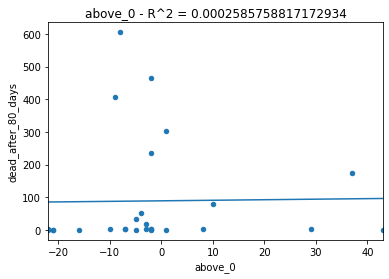

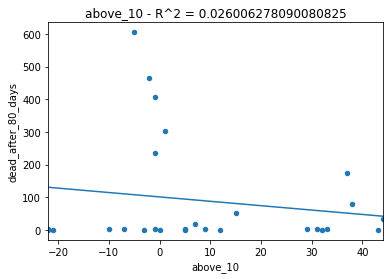

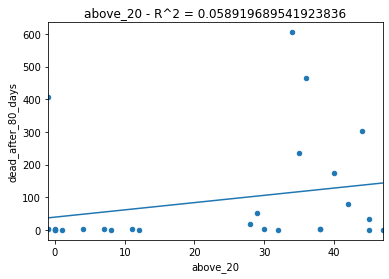

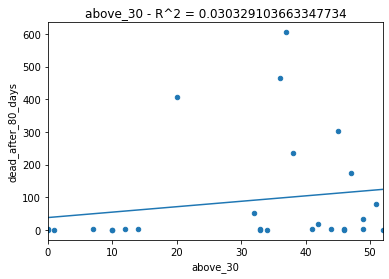

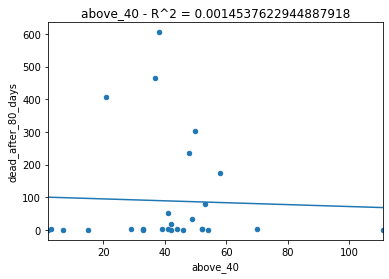

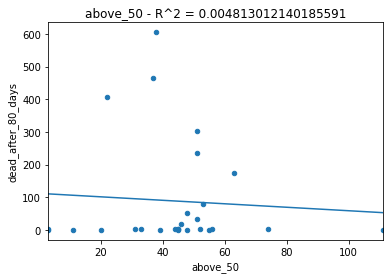

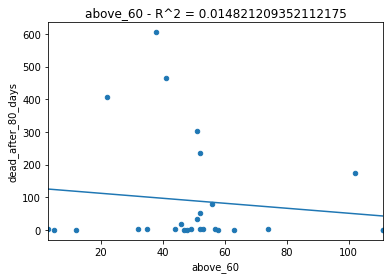

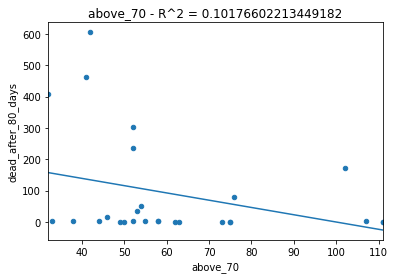

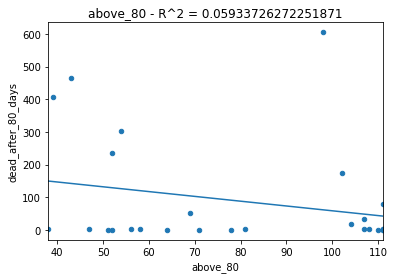

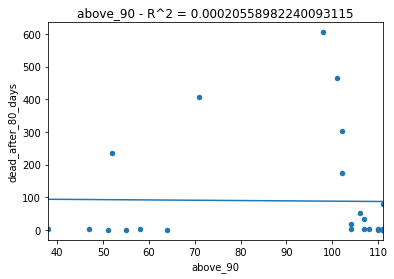

In [123]:
#Get date 80 days after first case
dead_after_days['date_after_80_days'] = dead_after_days['first_case'].apply(lambda x: date_cols[x+80])

#Get dead 80 days after first case
for index, row in dead_after_days.iterrows():
    dead_after_days.at[index,'dead_after_80_days'] = dead_after_days[row['date_after_80_days']][index]

#Add dead after 80 days to reaction time dataframe and store in new variable
new_reaction_time_df = reaction_time_df.merge(dead_after_days[['country_code','dead_after_80_days']], on='country_code')

#Plot and calculate R^2
for i in range(10):
    lin_reg_df = new_reaction_time_df.copy()
    num = str(i*10)
    z = np.polyfit(x=new_reaction_time_df.loc[:, 'above_'+num], y=new_reaction_time_df.loc[:, 'dead_after_80_days'], deg=1)
    p = np.poly1d(z)
    lin_reg_df['trendline'] = p(lin_reg_df.loc[:, 'above_'+num])
    ax = lin_reg_df.plot.scatter(x='above_'+num, y='dead_after_80_days')
    lin_reg_df.set_index('above_'+num, inplace=True)
    
    r = R_squared(list(new_reaction_time_df['dead_after_80_days']), list(lin_reg_df['trendline']))
    lin_reg_df.trendline.sort_index(ascending=False).plot(title='above_'+num +' - R^2 = '+str(r),ax=ax)


This gives an even more uncertain result. 

There are not many countries to work with here, since a lot of countries have been filtered out because their first case was not early enough. This analysis might give other results if done when the pandemic is over and we have the final death count for each country. 